Sarah Salloum
20368321

In [1]:
import SimpleITK as sitk
import numpy as np
import matplotlib.pyplot as plt
%config Completer.use_jedi = False

Part 1) Image resampling 
a)

In [2]:
# load data and check the meta data
img = sitk.ReadImage("C:\\Users\\User\\Documents\\masters-queens\\BMIF804\\assignment 2\\intraop_mri_new.nrrd")

In [3]:
print('size: ',img.GetSize())
print('origin: ',img.GetOrigin())
print('spacing: ',img.GetSpacing())
print('direction: ',img.GetDirection())
print('pixel type: ',img.GetPixelIDTypeAsString())



size:  (140, 280, 45)
origin:  (-140.0, -139.5, -90.0)
spacing:  (2.0, 1.0, 4.0)
direction:  (1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0)
pixel type:  32-bit signed integer


In [4]:
# set Slicer as external viewer
external_viewer = sitk.ImageViewer()
slicer_app_location = "C:\\Users\\User\\AppData\\Local\\NA-MIC\\Slicer 5.0.3\\Slicer.exe"
external_viewer.SetApplication(slicer_app_location)

external_viewer.Execute(img)

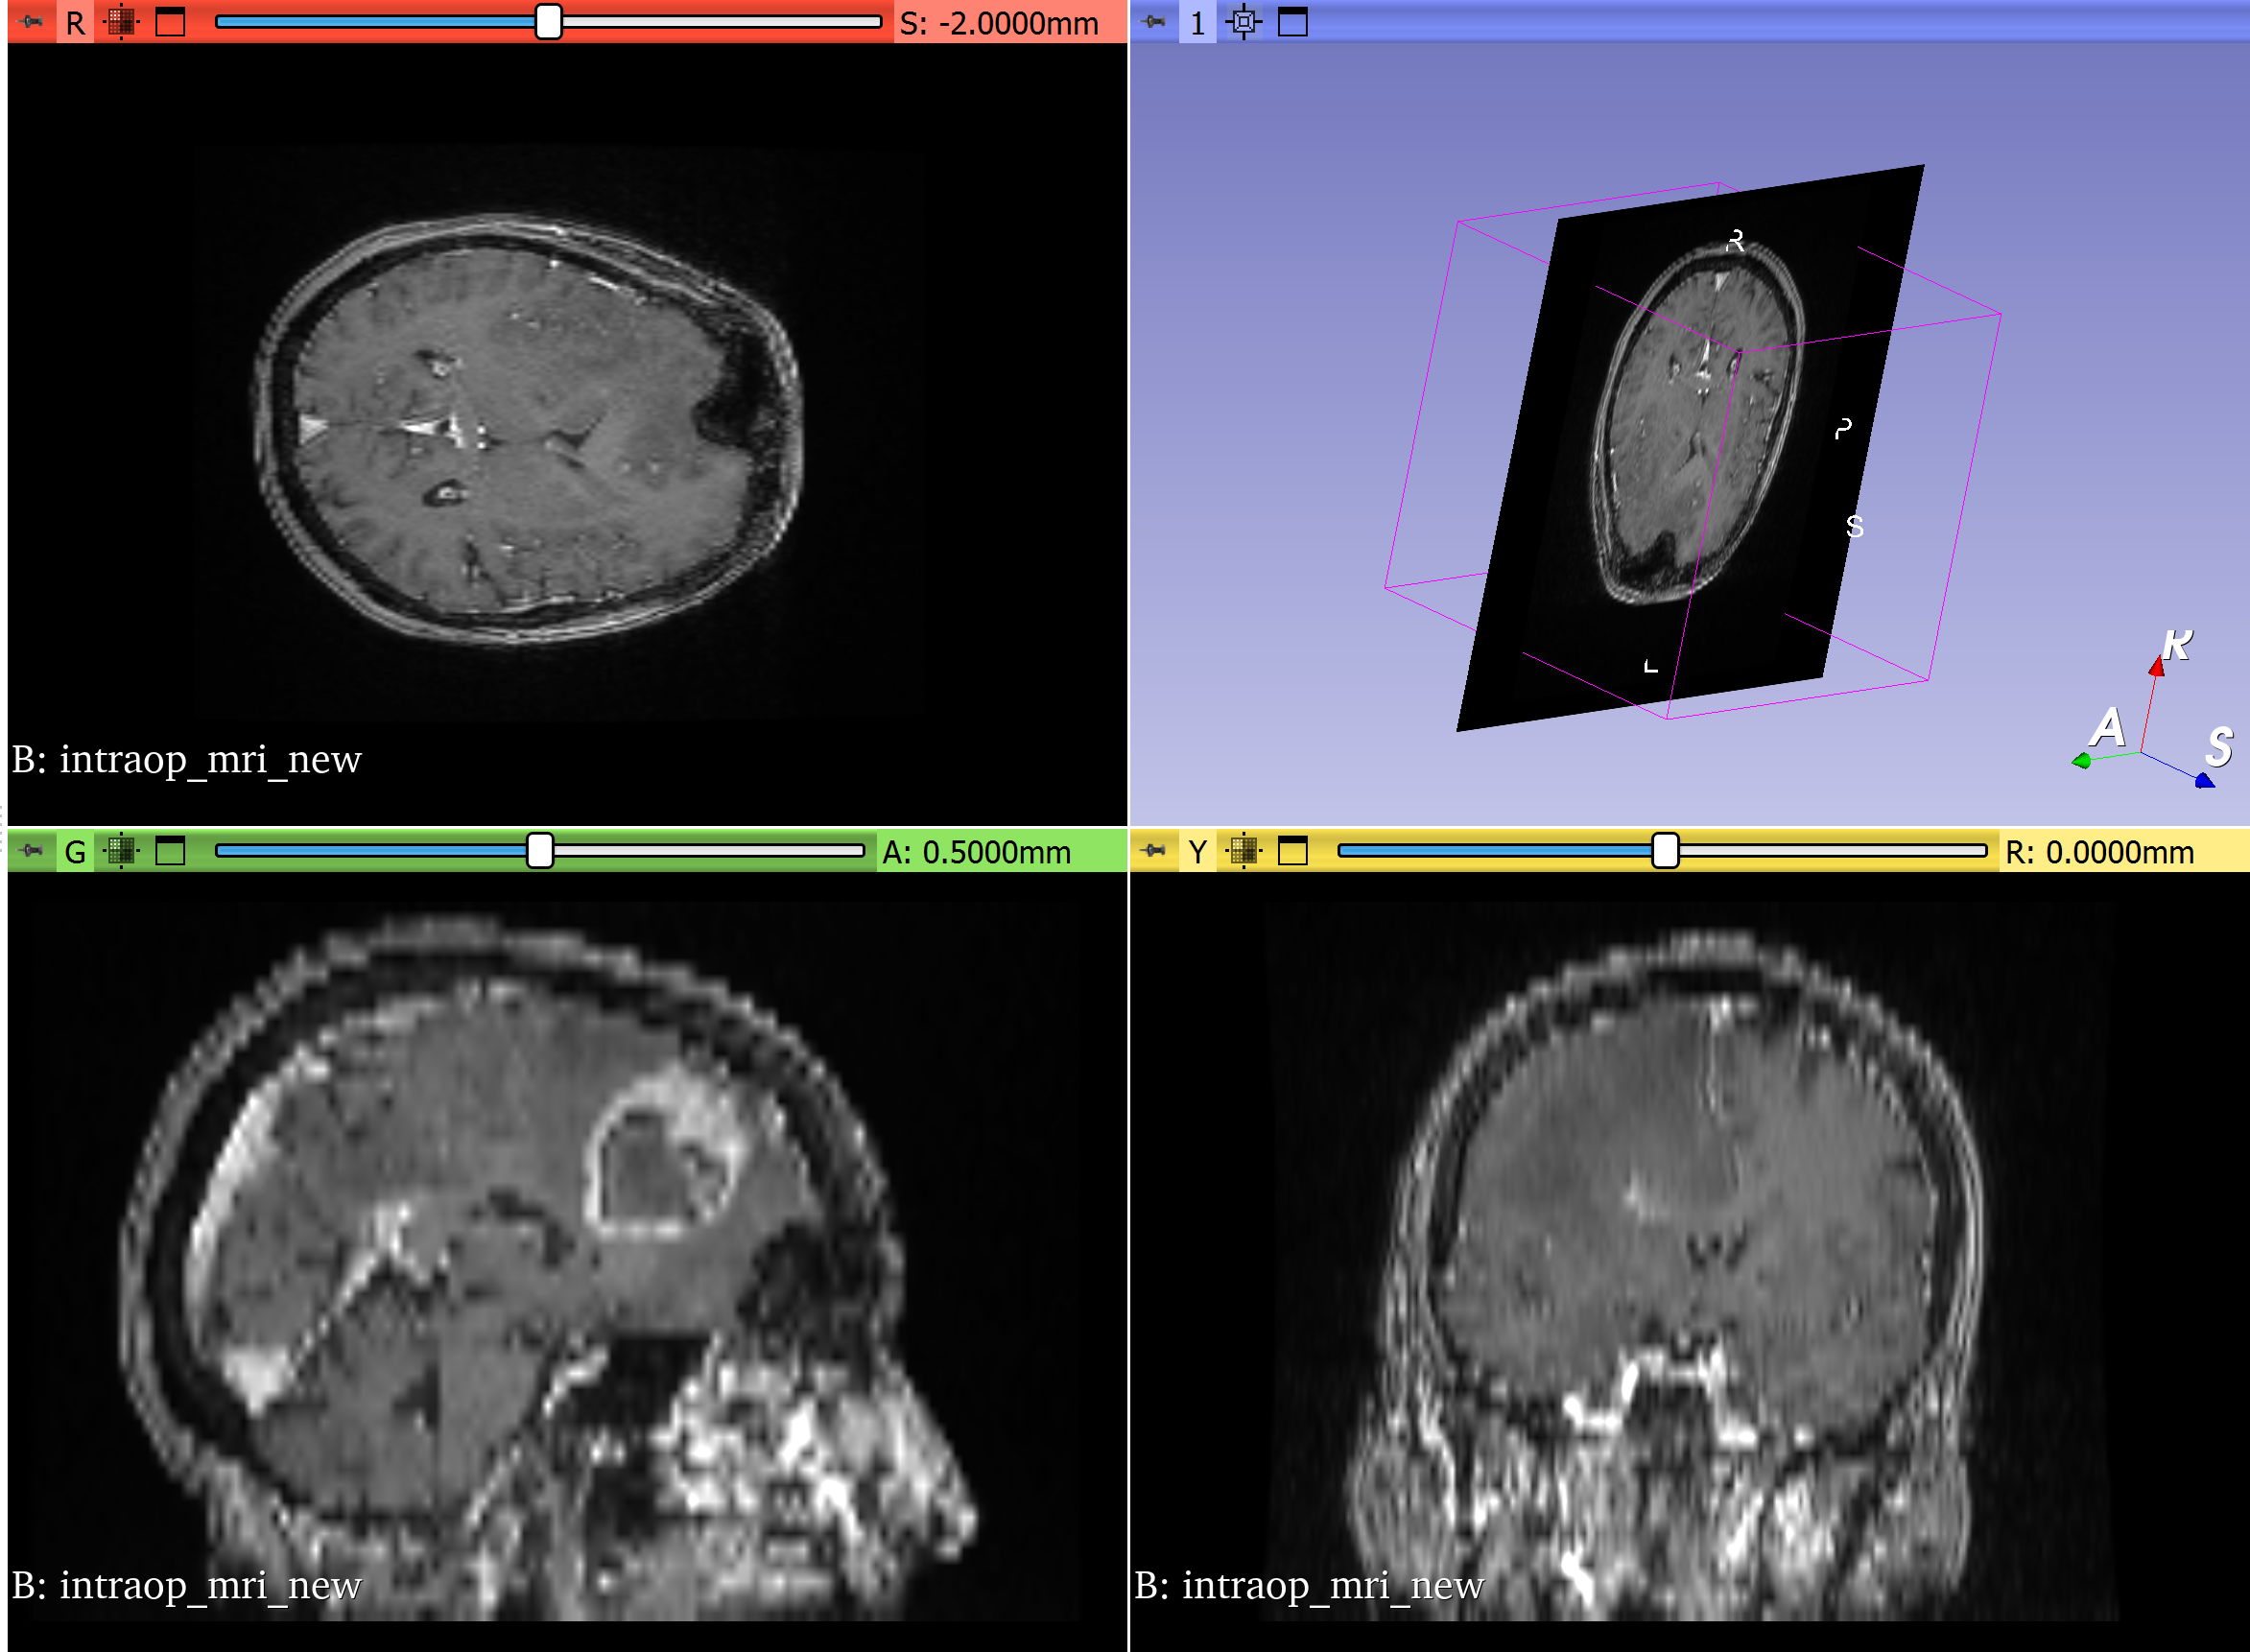

Part 1 b)

i) physical extent is origin + (size * spacing)

In [52]:
img_spacing = img.GetSpacing()
img_size = img.GetSize()
img_origin = img.GetOrigin()
x0=img_origin[0]
x1=img_origin[0]+(img_spacing[0]*img_size[0])
y0=img_origin[1]
y1=img_origin[1]+(img_spacing[1]*img_size[1])
z0=img_origin[2]
z1=img_origin[2]+(img_spacing[2]*img_size[2])

print('x0: ',x0)
print('x1: ',x1)
print('y0: ',y0)
print('y1: ',y1)
print('z0: ',z0)
print('z1: ',z1)

x0:  -140.0
x1:  140.0
y0:  -140.5
y1:  139.5
z0:  -90.0
z1:  90.0


ii) 

In [5]:
img.SetOrigin((-140.0, -140.5,-90))
img.SetSpacing((2.0, 1.0, 4.0))
img.TransformIndexToPhysicalPoint((140,280,45))

(140.0, 139.5, 90.0)

no difference, it seems that x1,y1,z1 are equal to the ones calculated by TransformIndexToPhysicalPoint() when inputting the right size

Part 1- c)

In [57]:
# calculate meta-data of the resampled image

img_spacing = [0.5,0.5,0.5]

img_origin = img.GetOrigin()

img_size_x = (x1 - img_origin[0])/0.5

img_size_y = (y1 - img_origin[1])/0.5

img_size_z = (z1  - img_origin[2])/0.5


print('img_size_x: ',img_size_x)

print('img_size_y: ',img_size_y)

print('img_size_z: ',img_size_z)

print("origin is the same as the origin of the original image: ",img_origin)
print('direction and pixel type as well:')
print('direction: ',img.GetDirection())
print('pixel type: ',img.GetPixelIDTypeAsString())
print('spacing is as mentioned: [0.5,0.5,0.5]')

img_size_x:  560.0
img_size_y:  560.0
img_size_z:  360.0
origin is the same as the origin of the original image:  (-140.0, -140.5, -90.0)
direction and pixel type as well:
direction:  (1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0)
pixel type:  32-bit signed integer
spacing: [0.5,0.5,0.5]


(direction, pixel type) will be similar to the volume prior to upsampling

Part 1) d)

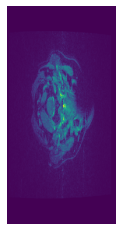

In [26]:
def data_resample(img, new_spacing):
    resampled= sitk.ResampleImageFilter()
    resampled.SetOutputSpacing(new_spacing)
    resampled.SetReferenceImage(img)
    resampled.SetOutputPixelType(32)
    return img

new_spacing = [0.5, 0.5, 0.5]
img_resample = data_resample(img[:,:,0],new_spacing)
plt.imshow(sitk.GetArrayFromImage(img_resample))
plt.axis('off')    
plt.show()

#save image
sitk.WriteImage(img_resample, "C:\\Users\\User\\Documents\\masters-queens\\BMIF804\\assignment 2\\img_resample.nrrd")

# set Slicer as external viewer

img_resample = sitk.ReadImage("C:\\Users\\User\\Documents\\masters-queens\\BMIF804\\assignment 2\\img_resample.nrrd")
external_viewer.Execute(img_resample)

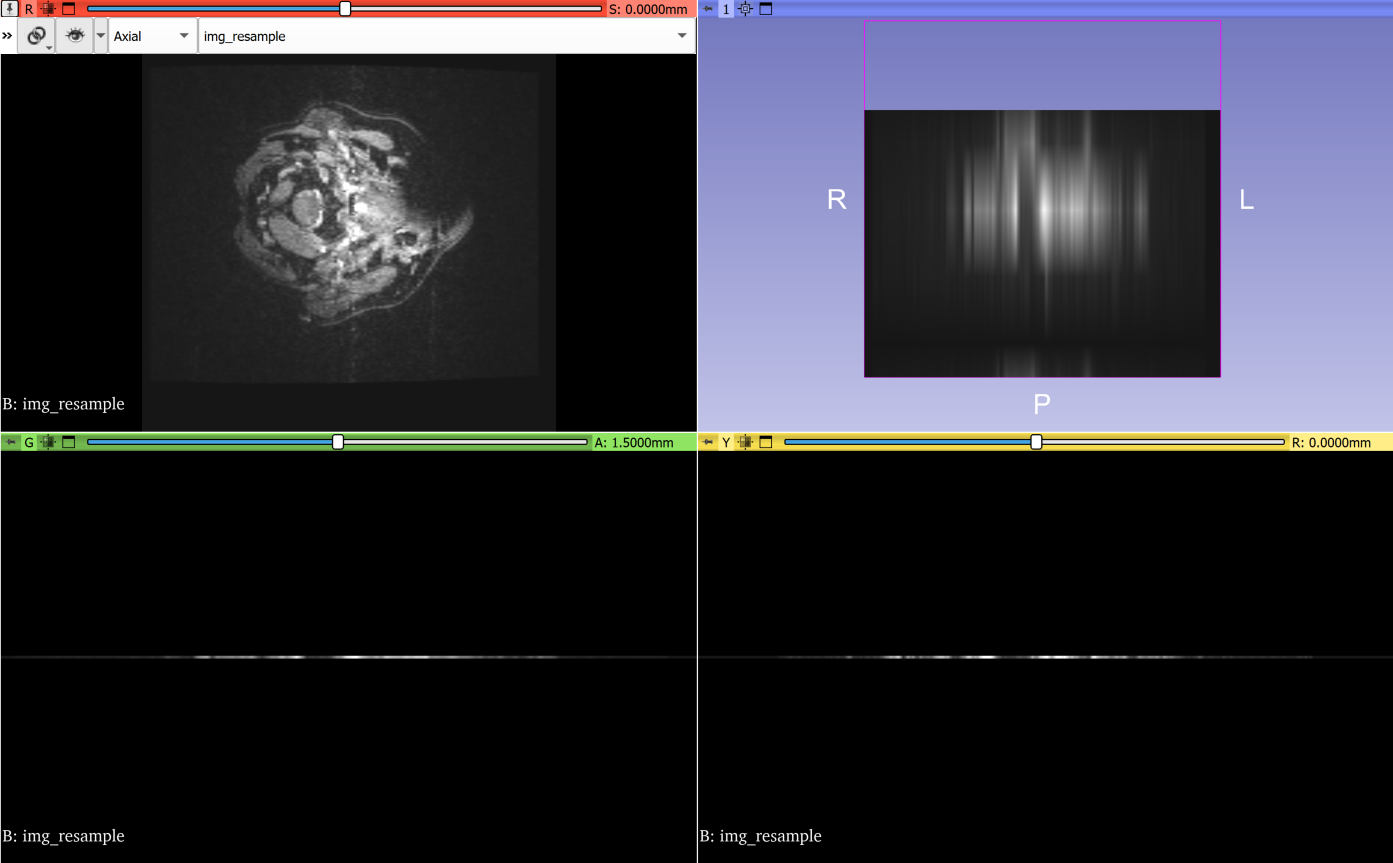

Part 1 - e)

In [27]:
print('size: ',img_resampled.GetSize())
print('origin: ',img_resampled.GetOrigin())
print('spacing: ',img_resampled.GetSpacing())
print('direction: ',img_resampled.GetDirection())
print('pixel type: ',img_resampled.GetPixelIDTypeAsString())

size:  (560, 560, 360)
origin:  (-140.0, -139.5, -90.0)
spacing:  (0.5, 0.5, 0.5)
direction:  (1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0)
pixel type:  32-bit signed integer


yes they match

Part 2 - a)

i)

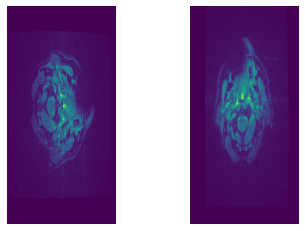

In [69]:
# define the Euler transformation
transform  = sitk.Euler3DTransform()

#set center
transform.SetCenter([-6, -12,0]) #LPS values calculated through a “fiducial” at the center  pixel of the volume deduced from splicer 

# add rotation around S coordinate (in LP plane)
transform.SetRotation(0,0,np.pi/2)


# apply the transformation to the image object
# we apply the transformation using resample function

img_rotated = sitk.Resample(img, img, transform, sitk.sitkLinear) #(image, reference image, transfomration, interpolation)

plt.subplot(1,2,1)
plt.imshow(sitk.GetArrayFromImage(img[:,:,0]))
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(sitk.GetArrayFromImage(img_rotated[:,:,0]))
plt.axis('off')
plt.show()

ii)

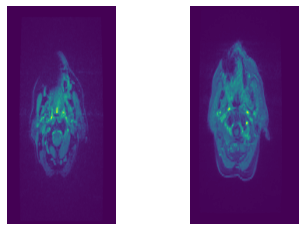

In [86]:
# define the Euler transformation
transform  = sitk.Euler3DTransform()


# add rotation around S coordinate (in LP plane)
transform.SetTranslation([10,10,10])


# apply the transformation to the image object
# we apply the transformation using resample function

img_transformed = sitk.Resample(img_rotated, img_rotated, transform, sitk.sitkLinear) #(image, reference image, transfomration, interpolation)

plt.subplot(1,2,1)
plt.imshow(sitk.GetArrayFromImage(img_rotated[0:,:,0]))
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(sitk.GetArrayFromImage(img_transformed[0:,:,0]))
plt.axis('off')
plt.show()

b) i)

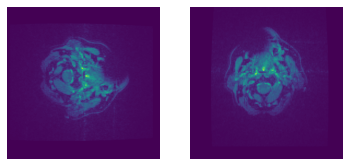

In [17]:
img_resampled = sitk.ReadImage("C:\\Users\\User\\Documents\\masters-queens\\BMIF804\\assignment 2\\img_resample.nrrd")

# define the Euler transformation
transform  = sitk.Euler3DTransform()

#set center
transform.SetCenter([-20, -2,0]) #LPS values calculated through a “fiducial” at the center

# add rotation around S coordinate (in LP plane)
transform.SetRotation(0,0,np.pi/2)


# apply the transformation to the image object
# we apply the transformation using resample function

img_rotated = sitk.Resample(img_resampled, img_resampled, transform, sitk.sitkLinear) #(image, reference image, transfomration, interpolation)

plt.subplot(1,2,1)
plt.imshow(sitk.GetArrayFromImage(img_resampled[:,:,0]))
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(sitk.GetArrayFromImage(img_rotated[:,:,0]))
plt.axis('off')
plt.show()



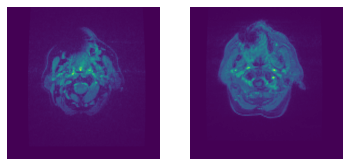

In [18]:

# define the Euler transformation
transform  = sitk.Euler3DTransform()

#set center
transform.SetCenter([-6, -12,0]) 


# add rotation around S coordinate (in LP plane)
transform.SetTranslation([10,10,10])


# apply the transformation to the image object
# we apply the transformation using resample function

img_transformed = sitk.Resample(img_rotated, img_rotated, transform, sitk.sitkLinear) #(image, reference image, transfomration, interpolation)

plt.subplot(1,2,1)
plt.imshow(sitk.GetArrayFromImage(img_rotated[0:,:,0]))
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(sitk.GetArrayFromImage(img_transformed[0:,:,0]))
plt.axis('off')
plt.show()

#save image
sitk.WriteImage(img_transformed, "C:\\Users\\User\\Documents\\masters-queens\\BMIF804\\assignment 2\\img_transformed.nrrd")

b)ii)

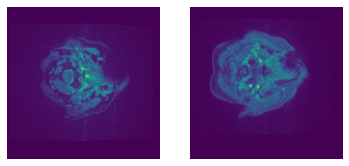

In [19]:
img_resampled = sitk.ReadImage("C:\\Users\\User\\Documents\\masters-queens\\BMIF804\\assignment 2\\img_resample.nrrd")

# define the Euler transformation
transform  = sitk.Euler3DTransform()

#set center
transform.SetCenter([-6, -12,0]) 

# add rotation around S coordinate (in LP plane)
transform.SetTranslation([10,10,10])


# apply the transformation to the image object
# we apply the transformation using resample function

img_transformed = sitk.Resample(img_resampled, img_resampled, transform, sitk.sitkLinear) #(image, reference image, transfomration, interpolation)

plt.subplot(1,2,1)
plt.imshow(sitk.GetArrayFromImage(img_resampled[0:,:,0]))
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(sitk.GetArrayFromImage(img_transformed[0:,:,0]))
plt.axis('off')
plt.show()

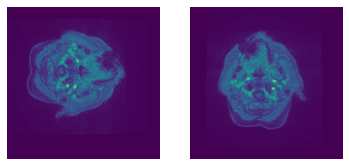

In [20]:
# define the Euler transformation
transform  = sitk.Euler3DTransform()

#set center
transform.SetCenter([-6, -12,0]) 

# add rotation around S coordinate (in LP plane)
transform.SetRotation(0,0,np.pi/2)


# apply the transformation to the image object
# we apply the transformation using resample function

img_rotated = sitk.Resample(img_transformed, img_transformed, transform, sitk.sitkLinear) #(image, reference image, transfomration, interpolation)

plt.subplot(1,2,1)
plt.imshow(sitk.GetArrayFromImage(img_transformed[:,:,0]))
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(sitk.GetArrayFromImage(img_rotated[:,:,0]))
plt.axis('off')
plt.show()

sitk.WriteImage(img_rotated, "C:\\Users\\User\\Documents\\masters-queens\\BMIF804\\assignment 2\\img_rotated.nrrd")

c- 

img_transformed is the one where it was rotated then translated

In [ ]:
img_transformed = sitk.ReadImage("C:\\Users\\User\\Documents\\masters-queens\\BMIF804\\assignment 2\\img_tramsformed.nrrd")
external_viewer.Execute(img_transformed)

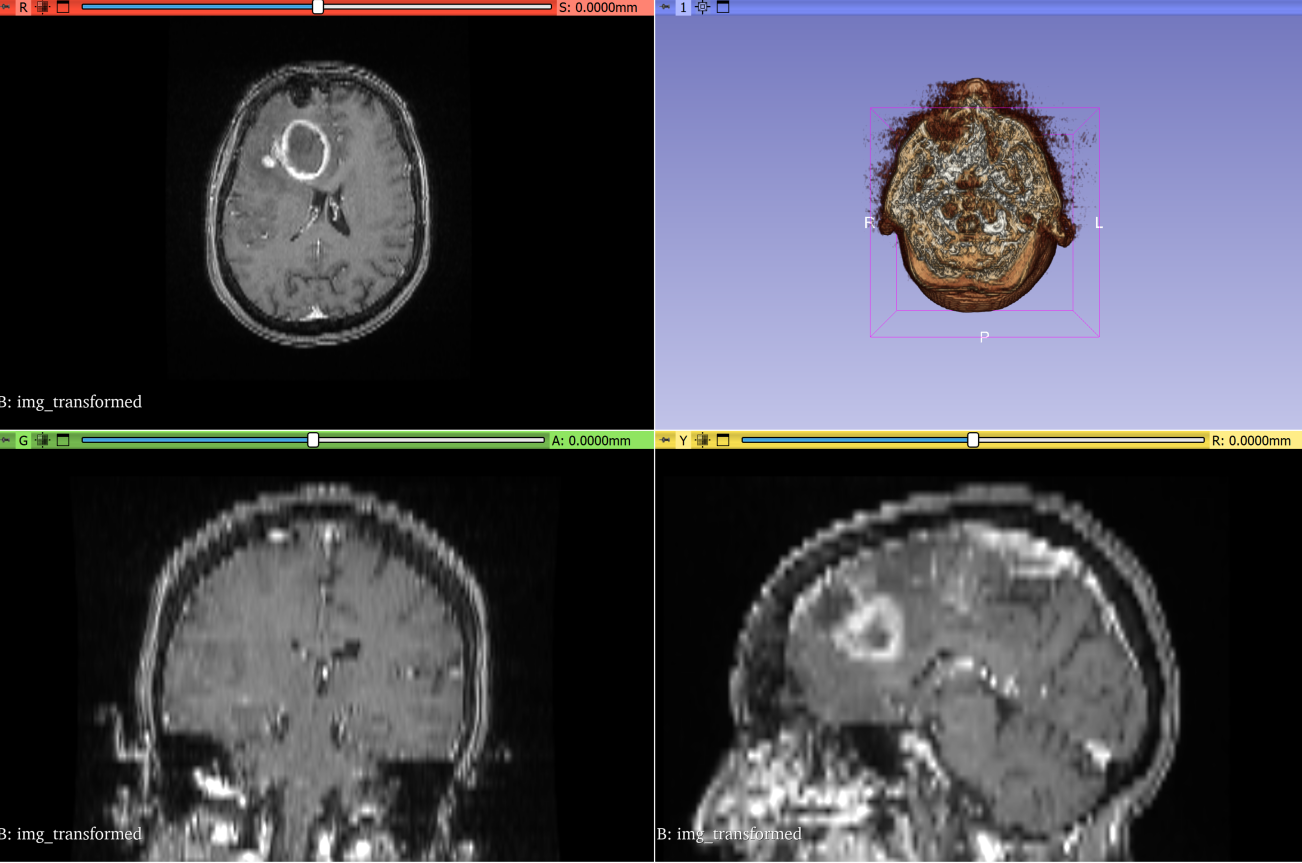

img_rotated is the one where it was translated then rotated

In [25]:
img_rotated = sitk.ReadImage("C:\\Users\\User\\Documents\\masters-queens\\BMIF804\\assignment 2\\img_rotated.nrrd")
external_viewer.Execute(img_rotated)

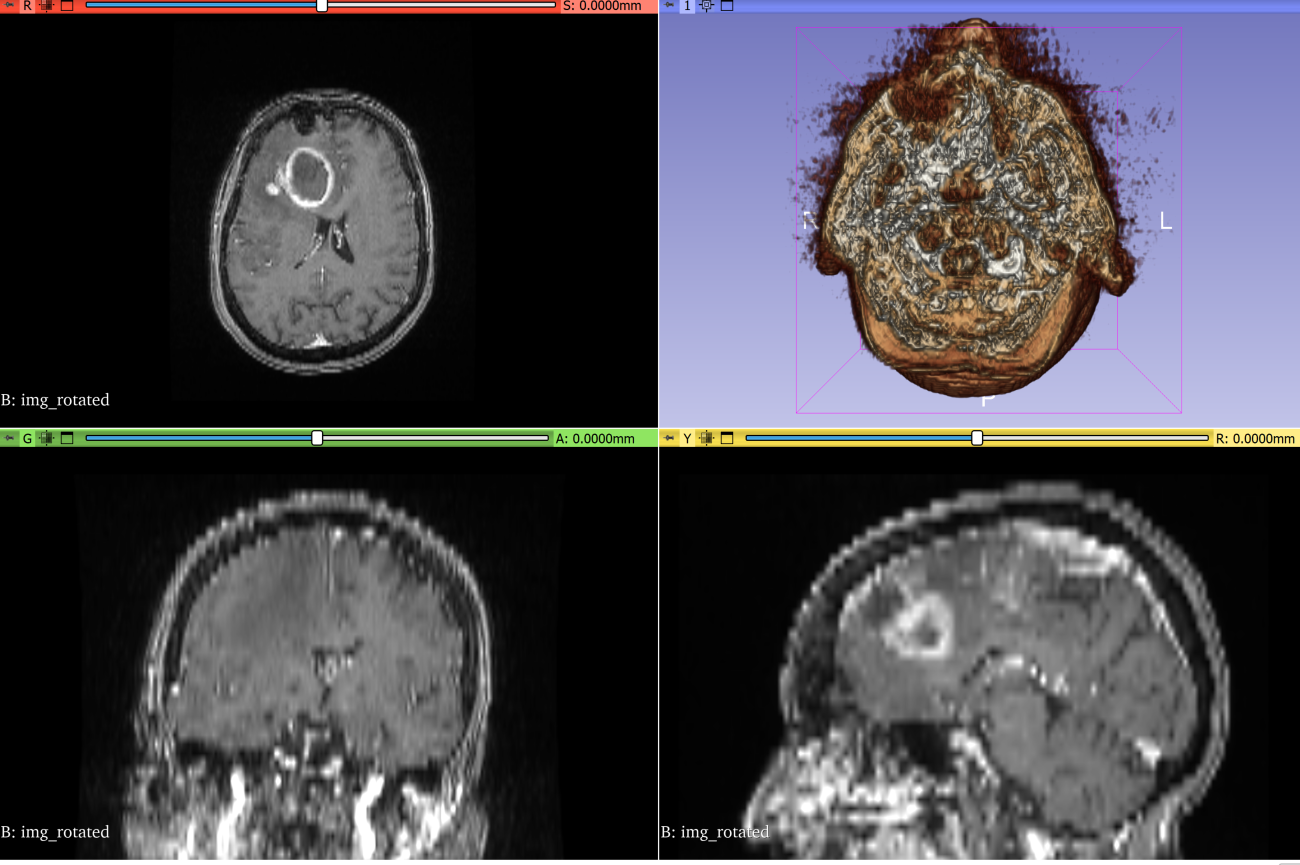

Part 3) Implementation in 3D Slicer 

a.

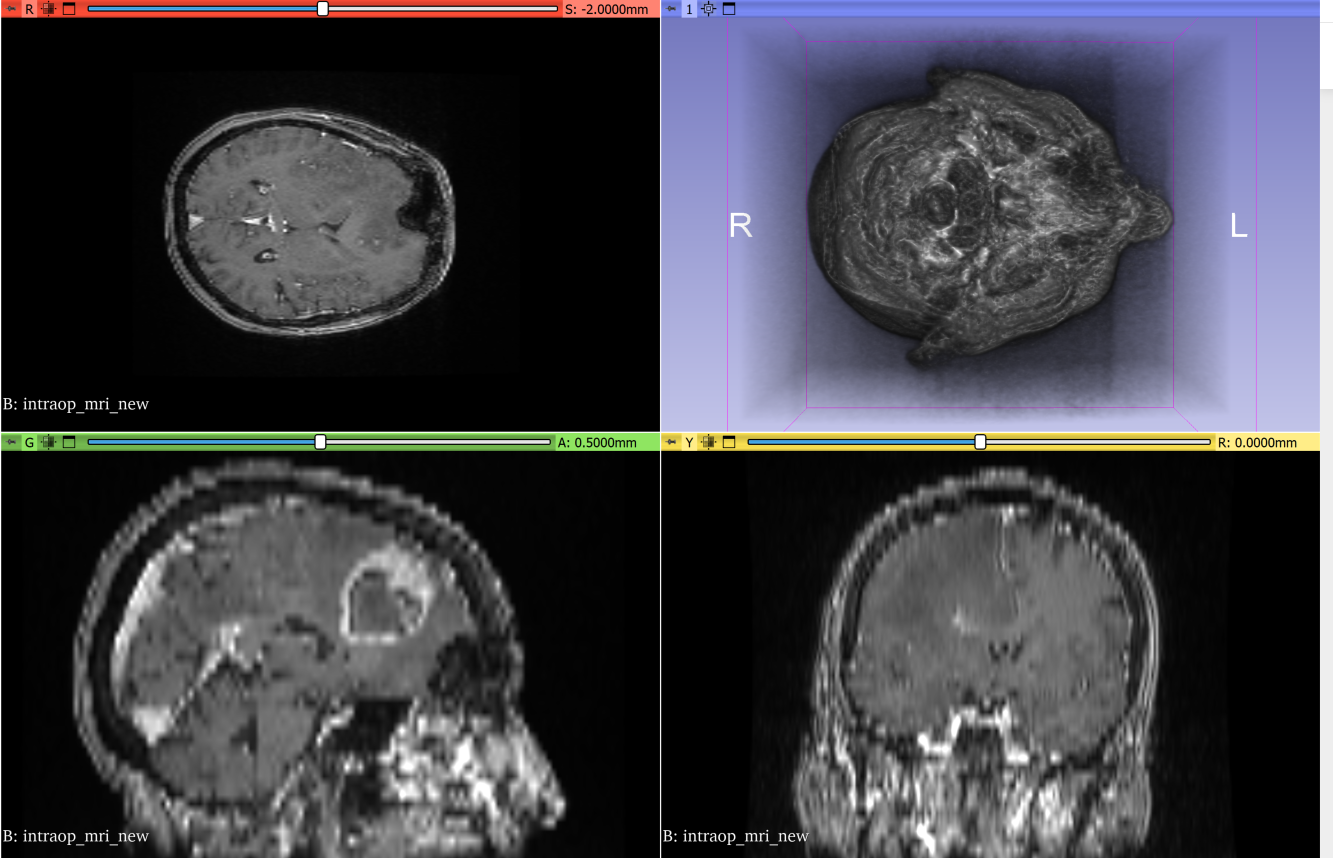

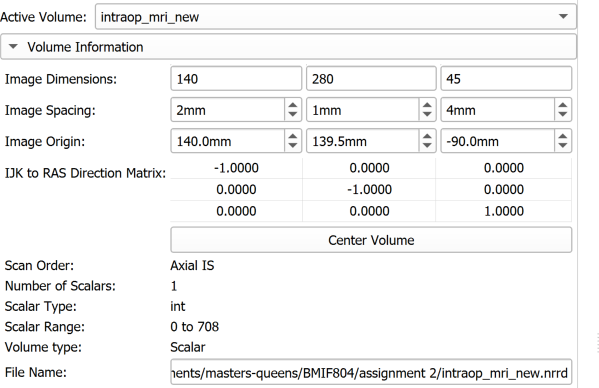

in the first part, meta data were:
size:  (140, 280, 45)
origin:  (-140.0, -139.5, -90.0)
spacing:  (2.0, 1.0, 4.0)
direction:  (1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0)
pixel type:  32-bit signed integer

It looks like the signs of the origin in x and y is the opposite sign (it is negative here but positive in slicer, everything else matches.

b.

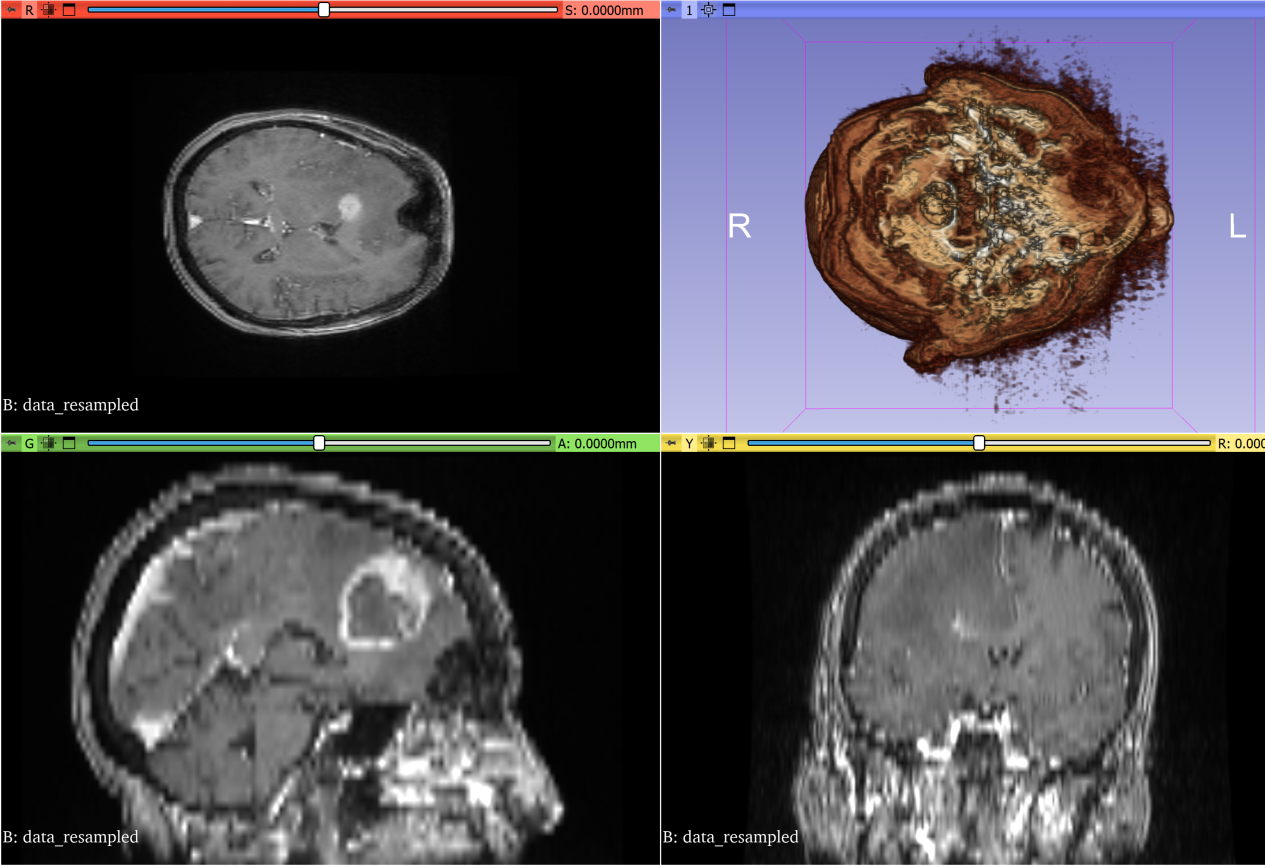

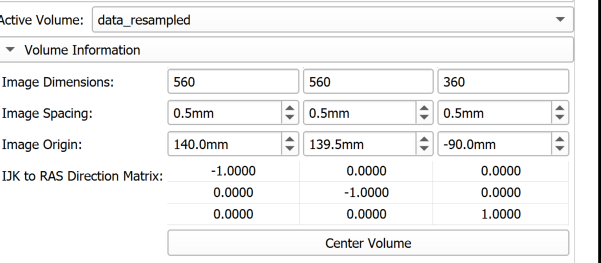

the values are the same as when we used the function sitk.ResampleImageFilter() in part d and when we did the calculations in part c

Part 3) c)

itk::simple::Euler3DTransform
 Euler3DTransform (0000022955A02860)
   RTTI typeinfo:   class itk::Euler3DTransform<double>
   Reference Count: 1
   Modified Time: 27970
   Debug: Off
   Object Name: 
   Observers: 
     none
   Matrix: 
     1 0 0 
     0 1 0 
     0 0 1 
   Offset: [0, 0, 0]
   Center: [0, 0, 0]
   Translation: [0, 0, 0]
   Inverse: 
     1 0 0 
     0 1 0 
     0 0 1 
   Singular: 0
   Euler's angles: AngleX=0 AngleY=0 AngleZ=0
   m_ComputeZYX = 0

itk::simple::Euler3DTransform
 Euler3DTransform (0000022955A034C0)
   RTTI typeinfo:   class itk::Euler3DTransform<double>
   Reference Count: 1
   Modified Time: 28025
   Debug: Off
   Object Name: 
   Observers: 
     none
   Matrix: 
     1 0 0 
     0 1 0 
     0 0 1 
   Offset: [0, 0, 0]
   Center: [0, 0, 0]
   Translation: [0, 0, 0]
   Inverse: 
     1 0 0 
     0 1 0 
     0 0 1 
   Singular: 0
   Euler's angles: AngleX=0 AngleY=0 AngleZ=0
   m_ComputeZYX = 0



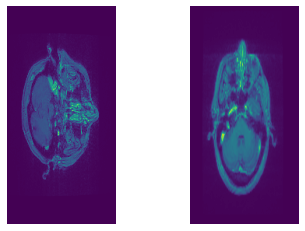

In [41]:
# define the Euler transformation
transform  = sitk.Euler3DTransform()
print(transform)

#set center
transform.SetCenter([-6, -12,0]) 

# add rotation around S coordinate (in LP plane)
transform.SetRotation(0,0,np.pi/2)

#translate

transform.SetTranslation([10,10,10])

# apply the transformation to the image object
# we apply the transformation using resample function

img_transformed = sitk.Resample(img, img, transform, sitk.sitkLinear) #(image, reference image, transfomration, interpolation)

# define the Euler transformation
transform  = sitk.Euler3DTransform()
print(transform)

#set center
transform.SetCenter([-6, -12,0]) 

# add rotation around S coordinate (in LP plane)
transform.SetRotation(0,0,np.pi/2)
slice_ind=10

plt.subplot(1,2,1)
plt.imshow(sitk.GetArrayFromImage(img[:,:,slice_ind]))
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(sitk.GetArrayFromImage(img_transformed[:,:,slice_ind]))
plt.axis('off')
plt.show()

In [43]:
# interactive
from ipywidgets import interact, fixed

def slice_view(img_transformed,slice_ind):
    plt.imshow(sitk.GetArrayFromImage(img_transformed[:,:,slice_ind]), 
               cmap='gray',vmin=0, vmax=400)
    plt.axis('off')
    plt.colorbar()
    plt.show()
    
interact(slice_view, img_transformed = fixed(img_transformed), slice_ind=(0,44))  

interactive(children=(IntSlider(value=22, description='slice_ind', max=44), Output()), _dom_classes=('widget-i…

<function __main__.slice_view(img_transformed, slice_ind)>

itk::simple::Euler3DTransform
 Euler3DTransform (0000022955A00B80)
   RTTI typeinfo:   class itk::Euler3DTransform<double>
   Reference Count: 1
   Modified Time: 35494
   Debug: Off
   Object Name: 
   Observers: 
     none
   Matrix: 
     1 0 0 
     0 1 0 
     0 0 1 
   Offset: [0, 0, 0]
   Center: [0, 0, 0]
   Translation: [0, 0, 0]
   Inverse: 
     1 0 0 
     0 1 0 
     0 0 1 
   Singular: 0
   Euler's angles: AngleX=0 AngleY=0 AngleZ=0
   m_ComputeZYX = 0

itk::simple::Euler3DTransform
 Euler3DTransform (0000022955A00D90)
   RTTI typeinfo:   class itk::Euler3DTransform<double>
   Reference Count: 1
   Modified Time: 35549
   Debug: Off
   Object Name: 
   Observers: 
     none
   Matrix: 
     1 0 0 
     0 1 0 
     0 0 1 
   Offset: [0, 0, 0]
   Center: [0, 0, 0]
   Translation: [0, 0, 0]
   Inverse: 
     1 0 0 
     0 1 0 
     0 0 1 
   Singular: 0
   Euler's angles: AngleX=0 AngleY=0 AngleZ=0
   m_ComputeZYX = 0



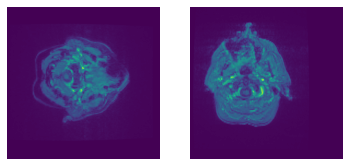

In [46]:
img_resampled = sitk.ReadImage("C:\\Users\\User\\Documents\\masters-queens\\BMIF804\\assignment 2\\img_resample.nrrd")
# define the Euler transformation
transform  = sitk.Euler3DTransform()
print(transform)

#set center
transform.SetCenter([-20, -2,0]) 

# add rotation around S coordinate (in LP plane)
transform.SetRotation(0,0,np.pi/2)

#translate

transform.SetTranslation([10,10,10])

# apply the transformation to the image object
# we apply the transformation using resample function

img_transformed = sitk.Resample(img_resampled, img_resampled, transform, sitk.sitkLinear) #(image, reference image, transfomration, interpolation)

# define the Euler transformation
transform  = sitk.Euler3DTransform()
print(transform)

#set center
transform.SetCenter([-6, -12,0]) 

# add rotation around S coordinate (in LP plane)
transform.SetRotation(0,0,np.pi/2)
slice_ind=10

plt.subplot(1,2,1)
plt.imshow(sitk.GetArrayFromImage(img_resampled[:,:,slice_ind]))
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(sitk.GetArrayFromImage(img_transformed[:,:,slice_ind]))
plt.axis('off')
plt.show()

In [49]:
# interactive
from ipywidgets import interact, fixed

def slice_view(img_transformed,slice_ind):
    plt.imshow(sitk.GetArrayFromImage(img_transformed[:,:,slice_ind]), 
               cmap='gray',vmin=0, vmax=400)
    plt.axis('off')
    plt.colorbar()
    plt.show()
    
interact(slice_view, img_transformed = fixed(img_transformed), slice_ind=(0,359))  

interactive(children=(IntSlider(value=179, description='slice_ind', max=359), Output()), _dom_classes=('widget…

<function __main__.slice_view(img_transformed, slice_ind)>